# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [29]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df_raw.sample(10)

,age,sex,bmi,children,smoker,region,charges
571,18,female,37.290,1,no,southeast,2219.44510
1123,27,female,32.395,1,no,northeast,18903.49141
692,20,male,32.395,1,no,northwest,2362.22905
64,20,female,22.420,0,yes,northwest,14711.74380
1119,30,female,19.950,3,no,northwest,5693.43050
804,23,male,26.510,0,no,southeast,1815.87590
980,54,male,25.460,1,no,northeast,25517.11363
74,44,male,27.400,2,no,southwest,7726.85400
11,62,female,26.290,0,yes,southeast,27808.72510
935,59,female,27.500,0,no,southwest,12233.82800


In [7]:
# es un dataset heterogenico, que contiene variables de varios tipos de clases
# hay una relacion linea, las variables categoricas son estratas
# vamos a llevar a numeros las varables categoricas (por ej. sexo), pero antes vamos a cuantificarlas 

In [8]:
df_raw['sex'].unique()

array(['female', 'male'], dtype=object)

In [9]:
df_raw.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [10]:
df_raw.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [11]:
df_raw.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [12]:
# transformacion  - encoding
# vamos a transformar las variables categorias a numeros para usarlos con skalearn
# regla: columnas de clase X a categorias - 1

df_raw['sex_female'] = df_raw['sex'].apply(lambda x:1 if x=='female' else 0 )

df_raw['smoker_yes'] = df_raw['sex'].apply(lambda x:1 if x=='yes' else 0 )

df_raw['region_sw'] = df_raw['sex'].apply(lambda x:1 if x=='southwest' else 0 )
df_raw['region_nw'] = df_raw['sex'].apply(lambda x:1 if x=='northwest' else 0 )
df_raw['region_ne'] = df_raw['sex'].apply(lambda x:1 if x=='northeast' else 0 )

df_raw=df_raw.drop(['sex','smoker','region'],axis=1)
df_interim=df_raw.copy()


In [13]:
df_raw.sample(10)

,age,bmi,children,charges,sex_female,smoker_yes,region_sw,region_nw,region_ne
962,63,35.200,1,14474.67500,1,0,0,0,0
787,21,36.860,0,1917.31840,0,0,0,0,0
1310,42,26.315,1,6940.90985,0,0,0,0,0
714,24,22.600,0,2457.50200,1,0,0,0,0
1121,46,38.170,2,8347.16430,0,0,0,0,0
245,54,30.020,0,24476.47851,0,0,0,0,0
449,35,38.600,1,4762.32900,0,0,0,0,0
998,33,36.290,3,6551.75010,1,0,0,0,0
600,18,39.160,0,1633.04440,1,0,0,0,0
413,25,23.900,5,5080.09600,0,0,0,0,0


In [14]:
# vamos a sacar el data set de pruebas y dejar en data set de aprendizaje
X = df_interim[['age', 'bmi', 'children', 'sex_female', 'smoker_yes', 'region_sw', 'region_nw', 'region_ne']]
y = df_interim['charges']
# sino hago esto se va a producir un ##data leakage## no podemos hacer estadistica hay que sacarlo antes de hacer el EDA

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)  


In [15]:
#entendamos las caracteristicas del ds de aprendizaje
X_train.describe()

,age,bmi,children,sex_female,smoker_yes,region_sw,region_nw,region_ne
count,1003.000000,1003.000000,1003.000000,1003.000000,1003.0,1003.0,1003.0,1003.0
mean,39.419741,30.712687,1.093719,0.493519,0.0,0.0,0.0,0.0
std,14.107312,6.022157,1.210891,0.500207,0.0,0.0,0.0,0.0
min,18.000000,15.960000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,26.000000,26.410000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,40.000000,30.495000,1.000000,0.000000,0.0,0.0,0.0,0.0
75%,52.000000,34.590000,2.000000,1.000000,0.0,0.0,0.0,0.0
max,64.000000,53.130000,5.000000,1.000000,0.0,0.0,0.0,0.0


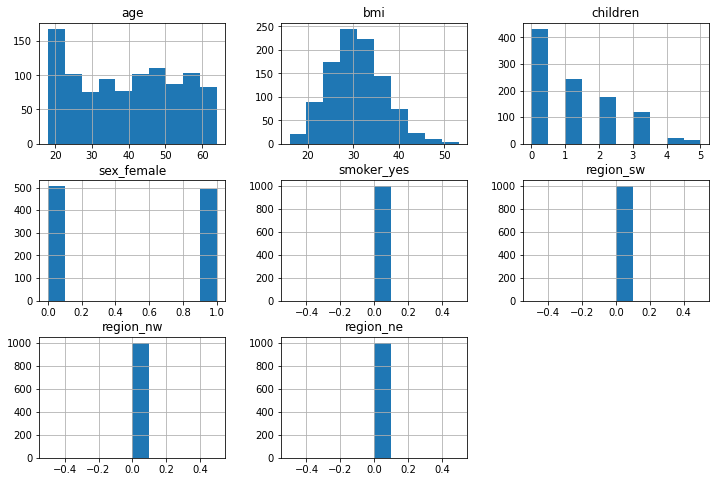

In [16]:
# Analisis UNIVARIADO
X_train.hist(figsize=(12,8))
plt.show()

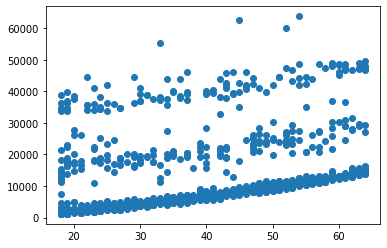

In [17]:
# EDA
# verificar que hay una relacion linean entre variables para hacer una regresion lineal
# eploramos ---> edad contra costo 

# Analisis BI VARIADO
plt.scatter(x=X_train['age'], y=y_train)
plt.show()

# encontramos como tres categorias dentro de la misma variable

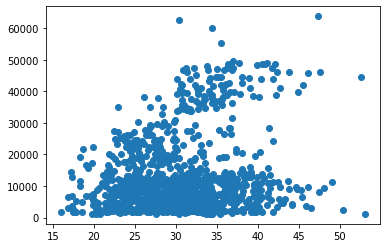

In [18]:
plt.scatter(x=X_train['bmi'], y=y_train)
plt.show()

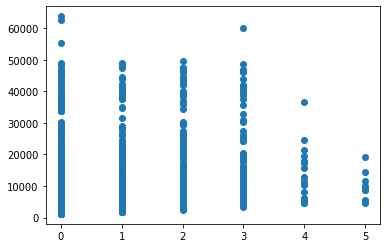

In [19]:
plt.scatter(x=X_train['children'], y=y_train)
plt.show()


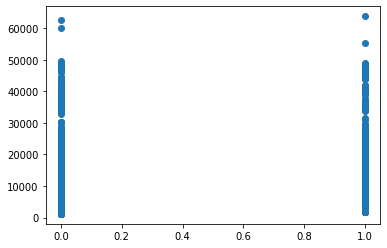

In [20]:
plt.scatter(x=X_train['sex_female'], y=y_train)
plt.show()

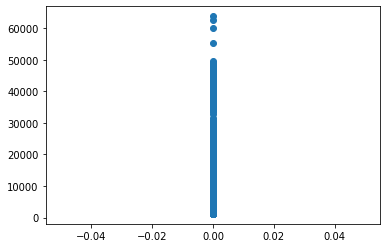

In [21]:
plt.scatter(x=X_train['smoker_yes'], y=y_train)
plt.show()

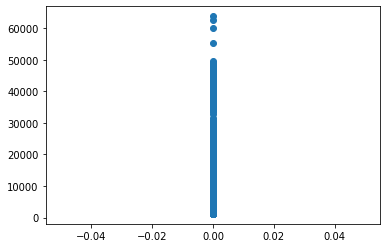

In [22]:
plt.scatter(x=X_train['region_sw'], y=y_train)
plt.show()

In [23]:
X_train.corr()

,age,bmi,children,sex_female,smoker_yes,region_sw,region_nw,region_ne
age,1.000000,0.112148,0.033683,0.024641,NaN,NaN,NaN,NaN
bmi,0.112148,1.000000,-0.006800,-0.058002,NaN,NaN,NaN,NaN
children,0.033683,-0.006800,1.000000,-0.015473,NaN,NaN,NaN,NaN
sex_female,0.024641,-0.058002,-0.015473,1.000000,NaN,NaN,NaN,NaN
smoker_yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_sw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_nw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_ne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:

lr = LinearRegression().fit(X_train,y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test,y_test))

0.09040474454564529


In [42]:
mi_modelo=LinearRegression()


In [43]:
mi_modelo.fit(X_train,y_train)

LinearRegression()

In [46]:
y_test_pred=mi_modelo.predict(X_test)
y_train_pred=mi_modelo.predict(X_train)

In [47]:
RMSE_train=mean_squared_error(y_train, y_train_pred, squared=False)
RMSE_val=mean_squared_error(y_test, y_test_pred, squared=False)
print('train :', RMSE_train, 'validation:', RMSE_val)

train : 11336.841256168216 validation: 11351.023041850334
